<a href="https://colab.research.google.com/github/arsyikamarifatika/COMPUTER_VISION/blob/main/DL_Sesi7_AutoEncoder(Siswa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import all the dependencies
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Then we will build our model and we will provide the number of dimensions that will decide how much the input will be compressed. The lesser the dimension, the more will be the compression.

In [29]:
encoding_dim = 15
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

Then we need to build the encoder model and decoder model separately so that we can easily differentiate between the input and output.

In [30]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [32]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Then we need to compile the model with the ADAM optimizer and cross-entropy loss function fitment.

In [33]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


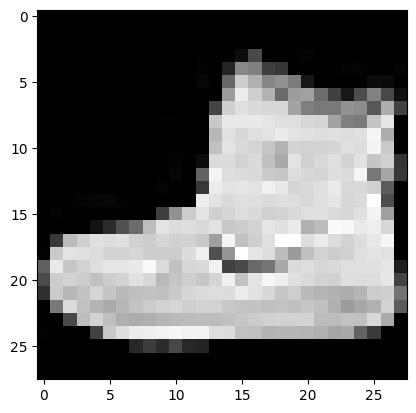

In [34]:
plt.imshow(x_train[0].reshape(28,28))

In [35]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 3s 8ms/step - loss: 0.4464 - val_loss: 0.3673
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.3472 - val_loss: 0.3356
Epoch 3/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3274 - val_loss: 0.3249
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3190 - val_loss: 0.3175
Epoch 5/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3126 - val_loss: 0.3120
Epoch 6/15
235/235 [==============================] - 2s 10ms/step - loss: 0.3081 - val_loss: 0.3085
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.3054 - val_loss: 0.3065
Epoch 8/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3039 - val_loss: 0.3054
Epoch 9/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3030 - val_loss: 0.3049
Epoch 10/15
235/235 [==============================] - 2s 7ms/step - loss: 0.3024 - val_loss: 0.30

313/313 [==============================] - 0s 1ms/step


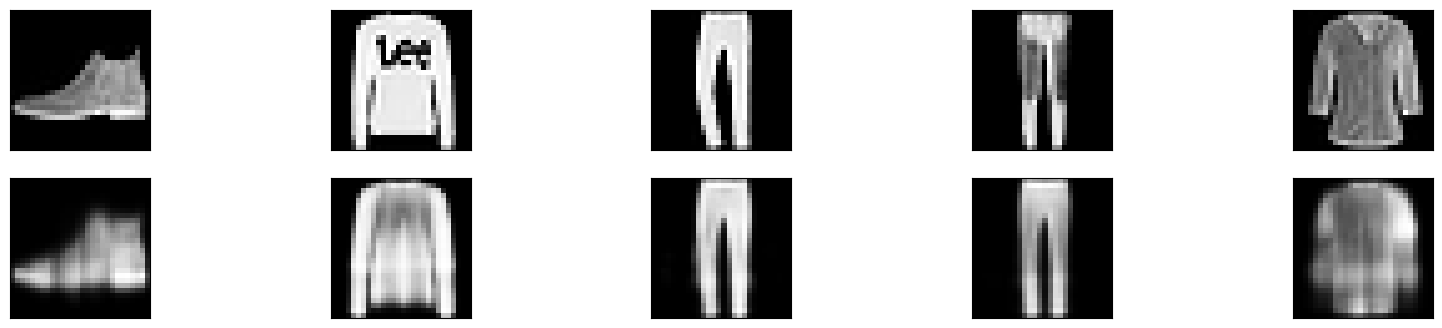

In [36]:
#After training, you need to provide the input and you can plot the results using the following code :

encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep CNN Autoencoder :

Since the input here is images, it does make more sense to use a Convolutional Neural network or CNN. The encoder will be made up of a stack of Conv2D and max-pooling layer and the decoder will have a stack of Conv2D and Upsampling Layer.

In [37]:
from tensorflow.keras.models import Sequential
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 15)          0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 14, 14, 15)       

In [38]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [39]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 126s 265ms/step - loss: 0.3060 - val_loss: 0.2798
Epoch 2/10
469/469 [==============================] - 127s 270ms/step - loss: 0.2738 - val_loss: 0.2733
Epoch 3/10
469/469 [==============================] - 123s 262ms/step - loss: 0.2692 - val_loss: 0.2700
Epoch 4/10
469/469 [==============================] - 126s 268ms/step - loss: 0.2666 - val_loss: 0.2675
Epoch 5/10
469/469 [==============================] - 121s 257ms/step - loss: 0.2647 - val_loss: 0.2659
Epoch 6/10
469/469 [==============================] - 123s 261ms/step - loss: 0.2631 - val_loss: 0.2645
Epoch 7/10
469/469 [==============================] - 117s 249ms/step - loss: 0.2620 - val_loss: 0.2637
Epoch 8/10
469/469 [==============================] - 121s 259ms/step - loss: 0.2610 - val_loss: 0.2625
Epoch 9/10
469/469 [==============================] - 117s 249ms/step - loss: 0.2601 - val_loss: 0.2618
Epoch 10/10
469/469 [==============================] - 122s 260m

313/313 [==============================] - 10s 33ms/step


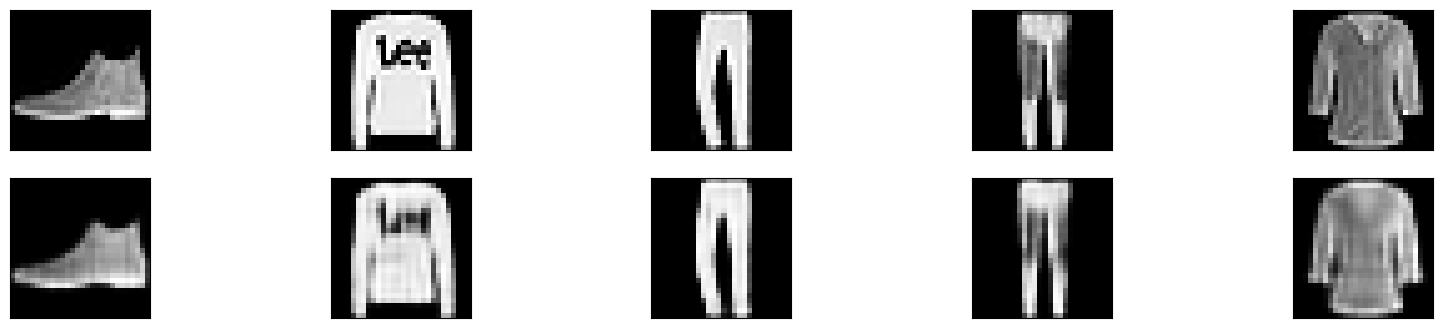

In [41]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Denoising Autoencoder
Now we will see how the model performs with noise in the image. What we mean by noise is blurry images, changing the color of the images, or even white markers on the image.

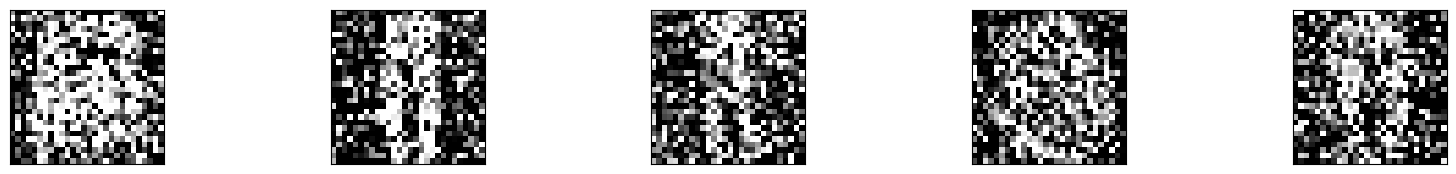

In [42]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

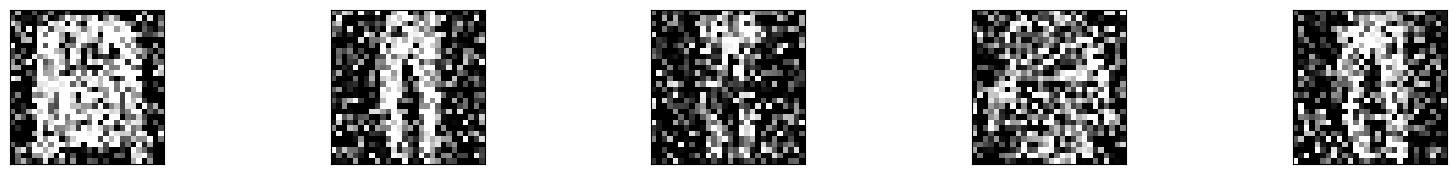

In [43]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [44]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 161s 342ms/step - loss: 0.3340 - val_loss: 0.3105
Epoch 2/5
469/469 [==============================] - 156s 332ms/step - loss: 0.3049 - val_loss: 0.3051
Epoch 3/5
469/469 [==============================] - 153s 326ms/step - loss: 0.3011 - val_loss: 0.3021
Epoch 4/5
469/469 [==============================] - 136s 290ms/step - loss: 0.2989 - val_loss: 0.3004
Epoch 5/5
469/469 [==============================] - 130s 278ms/step - loss: 0.2976 - val_loss: 0.2991


313/313 [==============================] - 5s 16ms/step


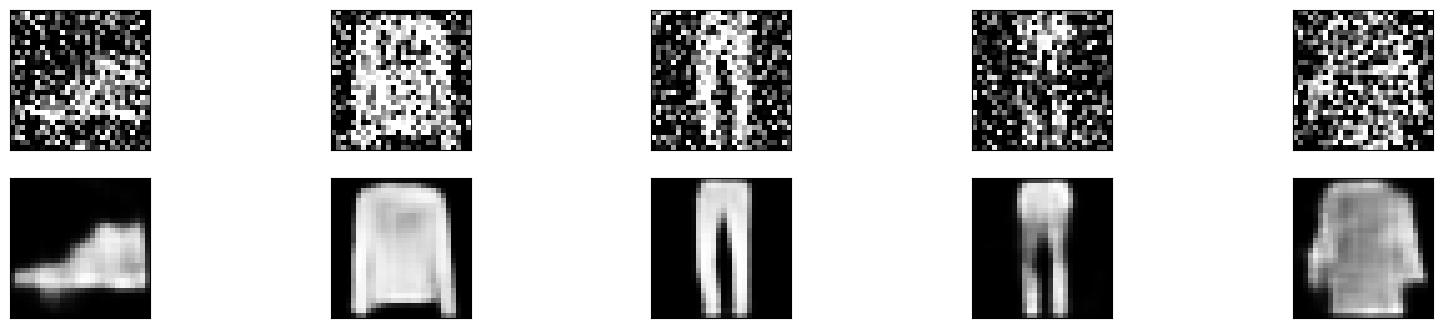

In [45]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()